# IF - 1018 Mineria de Datos

* numpy 
* sklearn
* matplotlib
* umap-learn


In [2]:
from sklearn import datasets
digits = datasets.load_digits()

# Actividad en clases

Análisis y Visualización de Dígitos utilizando Algoritmos de Reducción de Dimensionalidad. Trabaje con el conjunto de datos 'digitos' de sklearn e instale la libreria umap-learn antes de comenzar. 


### Exploración Inicial de Datos 
- **Cargue el conjunto de datos de dígitos de sklearn y muestre un resumen general del mismo, incluyendo la forma de los datos y las etiquetas disponibles.** 
  
- **Visualice las primeras 400 imágenes de los dígitos en una cuadrícula de 20x20 utilizando matplotlib.**

### Preprocesamiento de Datos

- **Normalice los datos de entrada para que cada característica esté en un rango similar utilizando MinMaxScaler.**

- **Divida el conjunto de datos en conjuntos de entrenamiento y prueba. Por ejemplo, puede utilizar 80% para entrenamiento y 20% para prueba.** 

### Visualización de los Datos con Reducción de Dimensionalidad

- **Aplique el algoritmo t-SNE para reducir la dimensionalidad de los datos a 2 dimensiones y visualice los resultados en un gráfico de dispersión, donde cada punto esté marcado con su etiqueta correspondiente.** 

- **Aplique el algoritmo UMAP para reducir la dimensionalidad de los datos a 2 dimensiones y visualice los resultados en un gráfico de dispersión, donde cada punto esté marcado con su etiqueta correspondiente.** 

### Interpretación y Discusión de Resultados

- **Compare los resultados de las visualizaciones obtenidas a partir de t-SNE y UMAP. Discuta las diferencias y similitudes observadas entre ambas técnicas.** 

- **Evalúe la idoneidad de cada método para este conjunto de datos. ¿Cuál de los dos métodos cree que proporciona una mejor representación de los dígitos? Comente.** 

- **Reflexione sobre cómo el preprocesamiento de datos y la elección de la técnica de reducción de dimensionalidad pueden afectar los resultados finales. ¿Qué pasos adicionales podría tomar para mejorar la visualización y el análisis de datos?** 

# SOLUCION

In [10]:
# Librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import umap.umap_ as umap
from matplotlib import offsetbox

/usr/local/Caskroom/miniconda/base/envs/datamining/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Carga del Conjunto de Datos
digits = datasets.load_digits()
X = digits.data[:400]
y = digits.target[:400]


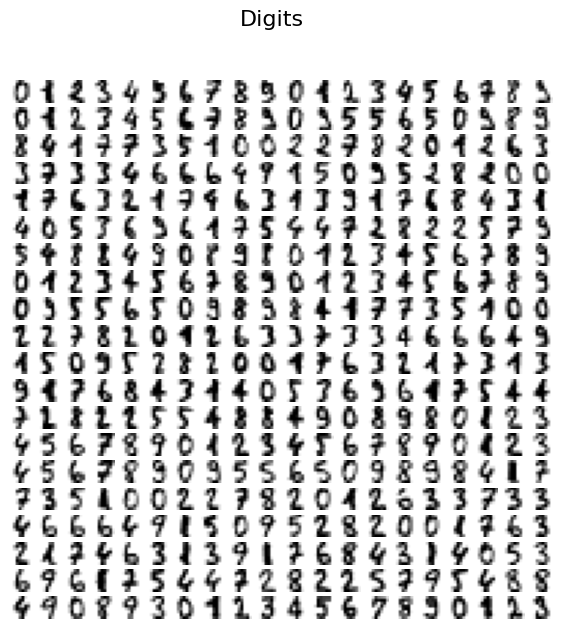

In [11]:
# Visualización Inicial
fig, axs = plt.subplots(nrows=20, ncols=20, figsize=(7, 7))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("Digits", fontsize=16)
plt.show()


In [12]:
# Preprocesamiento de Datos
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
# Visualización de los Datos con Reducción de Dimensionalidad
def plot_embedding(X, title):
    _, ax = plt.subplots(figsize=(8, 8))
    X = MinMaxScaler().fit_transform(X)

    for digit in digits.target_names:
        ax.scatter(
            *X[y == digit].T,
            marker=f"${digit}$",
            color=plt.cm.Dark2(digit),
            alpha=0.425,
        )
    shown_images = np.array([[1.0, 1.0]])  # just something big
    for i in range(X.shape[0]):
        dist = np.sum((X[i] - shown_images) ** 2, 1)
        if np.min(dist) < 5e-3:
            continue
        shown_images = np.concatenate([shown_images, [X[i]]], axis=0)
        imagebox = offsetbox.AnnotationBbox(
            offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r), X[i]
        )
        ax.add_artist(imagebox)

    ax.set_title(title)
    ax.axis("off")


/usr/local/Caskroom/miniconda/base/envs/datamining/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


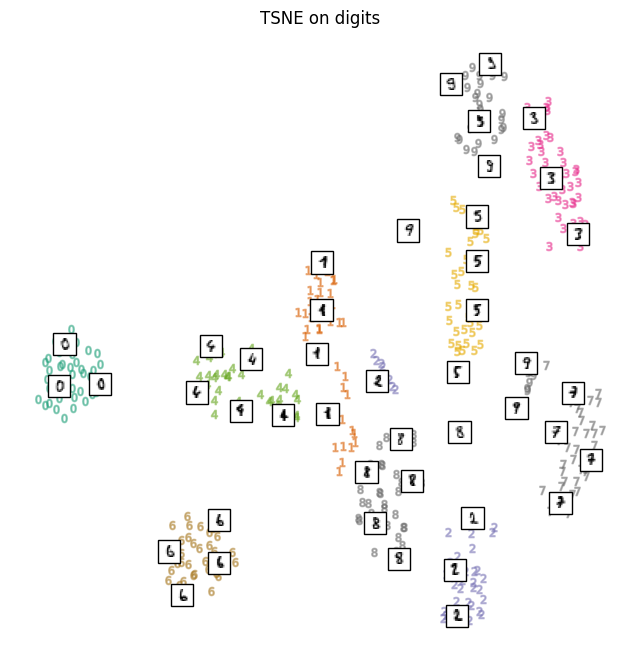

In [14]:
# Implementación de t-SNE
tsne_embed = TSNE(n_components=2, perplexity=40, n_iter=500, n_iter_without_progress=150, n_jobs=10)
projection_tsne = tsne_embed.fit_transform(X_scaled)
plot_embedding(projection_tsne, 'TSNE on digits')
plt.show()


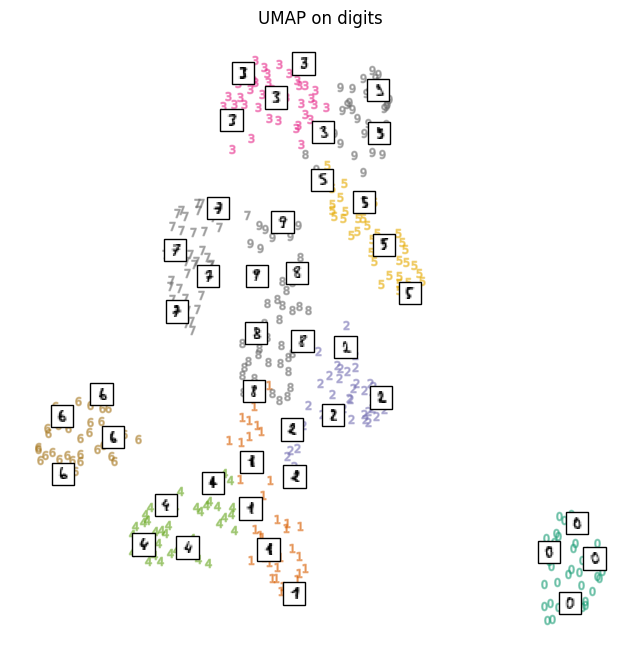

In [23]:
# Implementación de UMAP
umap_2d = umap.UMAP(n_components=2, min_dist=0.6, n_neighbors=40, n_jobs=-1)
projection_umap = umap_2d.fit_transform(X_scaled)
plot_embedding(projection_umap, 'UMAP on digits')
plt.show()


# Utilizando Seaborn

In [20]:
import seaborn as sns
import pandas as pd

def plot_embedding_seaborn(X, y, title):
    # Crear un DataFrame para facilitar el uso con Seaborn
    df = pd.DataFrame(X, columns=['Dim1', 'Dim2'])
    df['Digit'] = y
    
    # Crear el gráfico usando Seaborn
    plt.figure(figsize=(8, 8))
    sns.scatterplot(data=df, x='Dim1', y='Dim2', hue='Digit', palette='tab10', s=100, alpha=0.6)
    
    plt.title(title)
    plt.legend(title='Digit')
    plt.show()


/usr/local/Caskroom/miniconda/base/envs/datamining/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


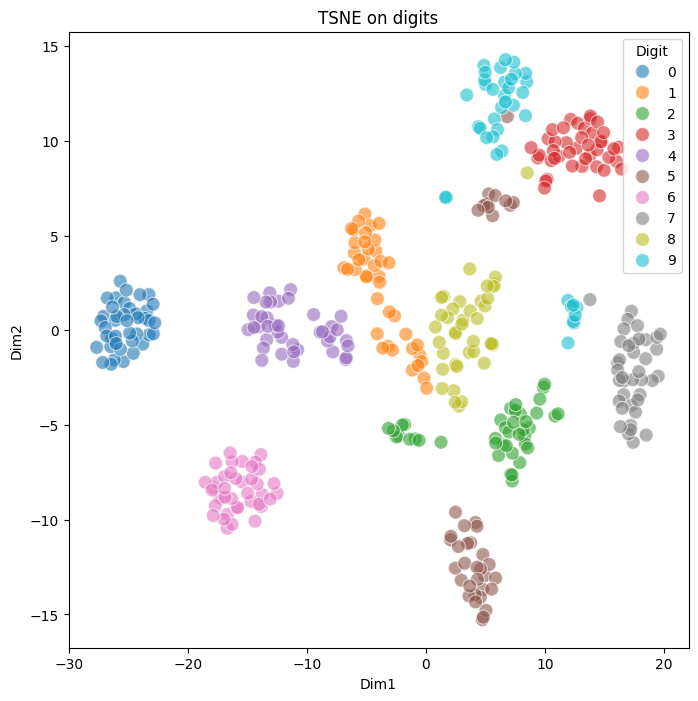

In [21]:
# Implementación de t-SNE
tsne_embed = TSNE(n_components=2, perplexity=40, n_iter=500, n_iter_without_progress=150, n_jobs=10)
projection_tsne = tsne_embed.fit_transform(X_scaled)
plot_embedding_seaborn(projection_tsne, y, 'TSNE on digits')


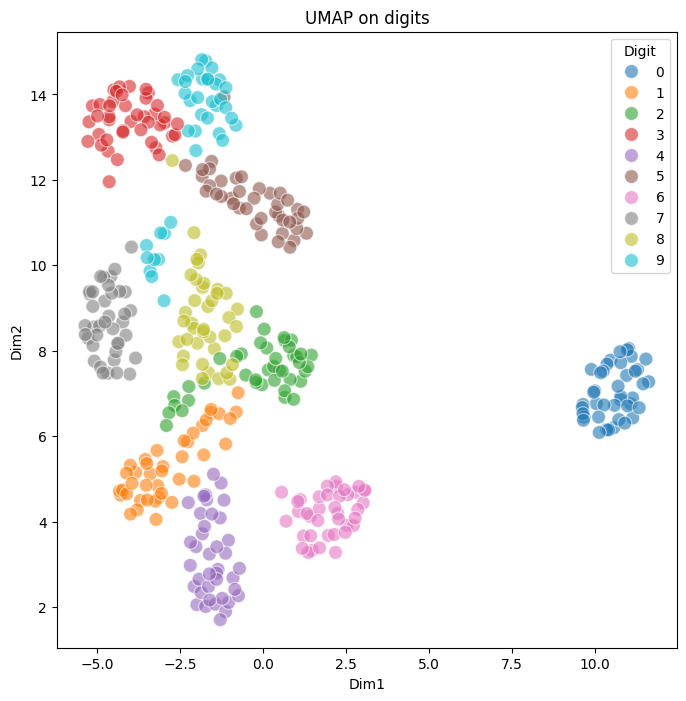

In [24]:
# Implementación de UMAP
umap_2d = umap.UMAP(n_components=2, min_dist=0.6, n_neighbors=40, n_jobs=-1)
projection_umap = umap_2d.fit_transform(X_scaled)
plot_embedding_seaborn(projection_umap, y, 'UMAP on digits')
